<a href="https://colab.research.google.com/github/naomih29/RockPaperScissorsTf/blob/master/Submission_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ambil resources
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-27 07:21:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.16MB/s    in 57s     

2020-07-27 07:22:48 (5.36 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# ekstraksi file zip yang telah diunduh
import zipfile, os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# cek direktori
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rps-cv-images', 'rock', 'scissors', 'paper']

In [ ]:
# tentukan base dir
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

os.listdir(base_dir)

['README_rpc-cv-images.txt', 'rock', 'scissors', 'paper']

In [ ]:
# import modul
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# proses augmentasi gambar pada setiap sampel dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
# persiapan data latih yang akan dipelajari oleh model
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    shuffle=True,
    subset='training',
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    # shuffle=True,
    subset='validation',
    class_mode='categorical'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
# buat arstitektur CNN 
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy']
)

In [ ]:
# jalankan model
model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=8,
    verbose=2
)

Epoch 1/20
32/32 - 20s - loss: 0.9768 - accuracy: 0.5850 - val_loss: 0.5376 - val_accuracy: 0.8125
Epoch 2/20
32/32 - 20s - loss: 0.3953 - accuracy: 0.8493 - val_loss: 0.3329 - val_accuracy: 0.8906
Epoch 3/20
32/32 - 20s - loss: 0.2681 - accuracy: 0.9121 - val_loss: 0.2941 - val_accuracy: 0.8984
Epoch 4/20
32/32 - 20s - loss: 0.2571 - accuracy: 0.9064 - val_loss: 0.2357 - val_accuracy: 0.9141
Epoch 5/20
32/32 - 20s - loss: 0.1475 - accuracy: 0.9547 - val_loss: 0.1254 - val_accuracy: 0.9648
Epoch 6/20
32/32 - 20s - loss: 0.1237 - accuracy: 0.9567 - val_loss: 0.2211 - val_accuracy: 0.9297
Epoch 7/20
32/32 - 20s - loss: 0.1506 - accuracy: 0.9492 - val_loss: 0.1458 - val_accuracy: 0.9570
Epoch 8/20
32/32 - 20s - loss: 0.0930 - accuracy: 0.9714 - val_loss: 0.1006 - val_accuracy: 0.9609
Epoch 9/20
32/32 - 20s - loss: 0.0654 - accuracy: 0.9783 - val_loss: 0.0929 - val_accuracy: 0.9727
Epoch 10/20
32/32 - 20s - loss: 0.0831 - accuracy: 0.9756 - val_loss: 0.1198 - val_accuracy: 0.9609
Epoch 11/

Using TensorFlow backend.


Saving 1yKjzquSvl9ShK7K.png to 1yKjzquSvl9ShK7K.png
1yKjzquSvl9ShK7K.png
paper


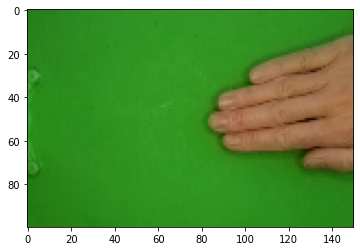

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')